In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import metrics
import sys
heart = pd.read_csv('Heart_Disease.csv')
heart

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [113]:
heart.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [114]:
df = heart.fillna(heart.mean())

In [115]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [116]:
x = df.drop('TenYearCHD',axis=1)
y = df.TenYearCHD

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [118]:
print("after splitting the data")
print("size of input train data",sys.getsizeof(x_train))
print("size of input test data",sys.getsizeof(x_test))
print("size of output train data",sys.getsizeof(y_train))
print("size of output test data",sys.getsizeof(y_train))

after splitting the data
size of input train data 433936
size of input test data 108560
size of output train data 54256
size of output test data 54256


In [119]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)
X_train=pd.DataFrame(x_train)
X_test = pd.DataFrame(x_test)

In [121]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train,y_train)
predictions = logisticRegr.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       710
           1       0.82      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.84      0.85      0.79       848



In [122]:
from sklearn.metrics import plot_confusion_matrix
cfn_matrix=metrics.confusion_matrix(y_test,predictions)
print("confusion matrix",cfn_matrix)

confusion matrix [[708   2]
 [129   9]]


C:\Users\admin\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


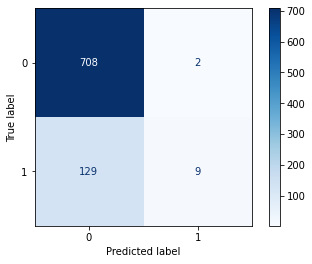

In [107]:
class_names=[0,1]
disp = plot_confusion_matrix(logisticRegr, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)

In [164]:
print('Accuracy Score :', accuracy_score(y_test, predictions))
print('Accuracy percentage is  '  ,round(accuracy_score(y_test, predictions)*  100 ),"%")



Accuracy Score : 0.8455188679245284
Accuracy percentage is   85 %


In [142]:
#For theta_0:
print(logisticRegr.intercept_ )
#For theta_1 and theta_2:
print(logisticRegr.coef_ )

[-1.99450414]
[[ 0.21635451  0.52284324 -0.00373038  0.01763908  0.27002551  0.01692892
   0.08452846  0.16742972  0.054612    0.0912552   0.29073846 -0.09032936
   0.03575889 -0.01982821  0.12616453]]
